<a href="https://colab.research.google.com/github/Nguyenhaoanhh/Anh-Hao/blob/main/Cifar100_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

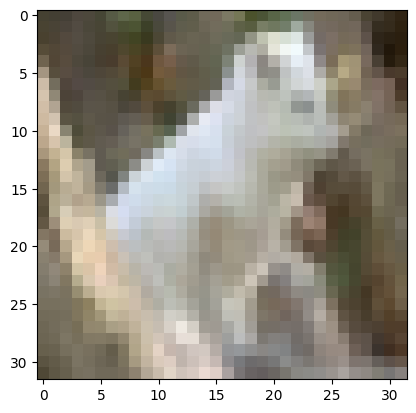

In [1]:
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from  keras.layers import Dense
from keras.utils import to_categorical

(x_train,y_train),(x_test,y_test) = cifar100.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

digist = x_train[15291]
plt.imshow(digist)
plt.show

In [2]:
model =  Sequential()
model.add(Dense(512,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(1024,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(100,activation='softmax'))
model.summary()

x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model = load_model('/content/cifar100.h5')
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['Accuracy'])
model.fit(x_train,y_train,epochs = 1,batch_size = 128)
model.save('cifar100.h5')
test_loss,test_agg = model.evaluate(x_test,y_test)
print('Score: ',test_loss)
print('Score: ',test_agg)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 100)               102500    
                                                                 
Total params: 2,201,188
Trainable params: 2,201,188
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 3s 10ms/step - loss: 3.8611 - Accuracy: 0.1080
Score:  3.861116409301758
Score:  0.1080000028014183


In [3]:
from keras.utils.image_utils import load_img
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

In [10]:
#Load Model And Train
model = load_model('/content/cifar100.h5')
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['Accuracy'])
model.fit(x_train,y_train,epochs = 10,batch_size = 128)
model.save('cifar100.h5')

Epoch 1/10
391/391 [==============================] - 20s 49ms/step - loss: 2.6207 - Accuracy: 0.3409
Epoch 2/10
391/391 [==============================] - 20s 51ms/step - loss: 2.5424 - Accuracy: 0.3589
Epoch 3/10
391/391 [==============================] - 20s 51ms/step - loss: 2.4895 - Accuracy: 0.3671
Epoch 4/10
391/391 [==============================] - 20s 51ms/step - loss: 2.4380 - Accuracy: 0.3786
Epoch 5/10
391/391 [==============================] - 19s 47ms/step - loss: 2.3823 - Accuracy: 0.3920
Epoch 6/10
391/391 [==============================] - 20s 52ms/step - loss: 2.3275 - Accuracy: 0.4039
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 2.2746 - Accuracy: 0.4172
Epoch 8/10
391/391 [==============================] - 20s 51ms/step - loss: 2.2316 - Accuracy: 0.4268
Epoch 9/10
391/391 [==============================] - 19s 48ms/step - loss: 2.1837 - Accuracy: 0.4366
Epoch 10/10
391/391 [==============================] - 20s 51ms/step - loss: 2.128

In [9]:
# Test Model
model100=load_model('/content/cifar100.h5')

img = load_img('/content/cat.jpg',target_size=(32,32)) 
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model100.predict(img),axis=-1)

1/1 [==============================] - 0s 63ms/step


array([4])